In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import missingno as mns

import warnings
warnings.filterwarnings('ignore')

In [2]:
india_main = pd.read_csv('./data/covid_19_india.csv')
india_main.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [3]:
india_main.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9286,9287,09/12/20,8:00 AM,Telengana,-,-,266120,1480,275261
9287,9288,09/12/20,8:00 AM,Tripura,-,-,32169,373,32945
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173
9290,9291,09/12/20,8:00 AM,West Bengal,-,-,475425,8820,507995


In [4]:
# Drop columns that are not required
im_copy = india_main.copy()
im_copy = im_copy.drop(['ConfirmedIndianNational', 'ConfirmedForeignNational', 'Sno', 'Time'], axis = 1)
im_copy.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3


In [5]:
# Rename the columns
im_copy.columns = ['date', 'state/ut', 'cured', 'deaths', 'confirmed']
im_copy.head()

,date,state/ut,cured,deaths,confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3


In [6]:
# Import Tests Data
india_tests = pd.read_csv('./Data/StatewiseTestingDetails.csv')
india_tests.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [7]:
it_copy = india_tests.copy()
it_copy.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [8]:
# Rename the columns
it_copy.columns = ['date', 'state/ut', 'total_samples', 'negative', 'positive']
it_copy.head()

,date,state/ut,total_samples,negative,positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [9]:
it_copy.tail()

,date,state/ut,total_samples,negative,positive
8061,2020-12-04,West Bengal,6047279.0,NaN,NaN
8062,2020-12-05,West Bengal,6091668.0,NaN,NaN
8063,2020-12-06,West Bengal,6135854.0,NaN,NaN
8064,2020-12-07,West Bengal,6167307.0,NaN,NaN
8065,2020-12-08,West Bengal,6211537.0,NaN,NaN


In [11]:
im_copy['state/ut'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

In [14]:
def remove_asterisked_values(df):
    for i in im_copy['state/ut'].iteritems():
        if i[1][-3:] == "***":
            df.drop(i[0], inplace = True)

remove_asterisked_values(im_copy)

In [15]:
im_copy['state/ut'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana'],
      dtype=object)

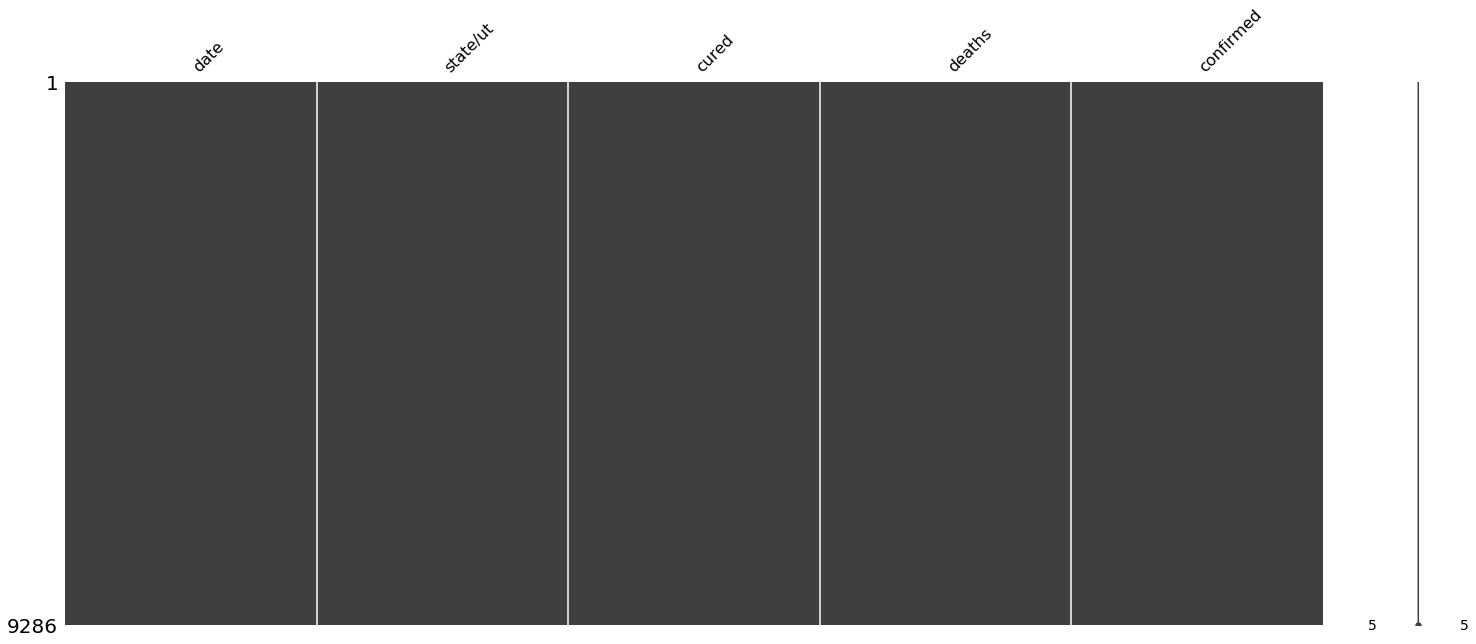

In [16]:
# Check missing values
mns.matrix(im_copy)

#### Cells that may be deleted later

In [17]:
df_delhi = im_copy[(im_copy['state/ut'] == 'Delhi')]
df_delhi.head()

,date,state/ut,cured,deaths,confirmed
34,02/03/20,Delhi,0,0,1
38,03/03/20,Delhi,0,0,1
42,04/03/20,Delhi,0,0,1
45,05/03/20,Delhi,0,0,2
51,06/03/20,Delhi,0,0,3


In [18]:
df_karnataka = im_copy[(im_copy['state/ut'] == 'Karnataka')]
df_karnataka.head()

,date,state/ut,cured,deaths,confirmed
74,09/03/20,Karnataka,0,0,1
89,10/03/20,Karnataka,0,0,4
108,11/03/20,Karnataka,0,0,4
119,12/03/20,Karnataka,0,0,4
132,13/03/20,Karnataka,0,1,6


In [19]:
df_karnataka.tail()

,date,state/ut,cured,deaths,confirmed
9131,05/12/20,Karnataka,853461,11834,890360
9166,06/12/20,Karnataka,854861,11846,891685
9201,07/12/20,Karnataka,855750,11856,893006
9236,08/12/20,Karnataka,857351,11867,894004
9271,09/12/20,Karnataka,858370,11880,895284
